# Qual celular devo comprar?

> Comparando marcas, modelos, preços, características e desvalorização de celulares. Alguns Filtros pré fixados são:
> - memória RAM de ao menos 8GB
> - memória interna de ao menos 64GB
> - removi outliers de preços olhando apenas 200000-10000000
> - somente produtos na categoria de celulares
> - marcas pesquisadas:
>   - IPhone
>   - Samsung
>   - Xiaomi
>   - Motorola

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('result_push.csv', index_col="id")

df['storage_size'] = df['storage'].str.extract('(\d+)').astype(int)
df['memory_size'] = df['memory'].str.extract('(\d+)').astype(int)

# Clear outliers
df = df[df['storage_size'].between(20, 600)] # the biggest storage size available today is 512
df = df[df['memory_size'].between(6, 25)] # the biggest memory size available today is 24

df.head()

,title,price,permalink,brand,line,model,processor,storage,memory,condition,storage_size,memory_size
id,,,,,,,,,,,,
MLA1414137615,Celular Galaxy S23 256gb Green Color Verde Oscuro,1267190.0,https://articulo.mercadolibre.com.ar/MLA-14141...,Samsung,Galaxy,S23,Snapdragon 8 Gen 2,256 GB,8 GB,new,256,8
MLA1329094555,Samsung Galaxy S23 Ultra 5g 256 Gb Phantom Bl...,1999999.0,https://articulo.mercadolibre.com.ar/MLA-13290...,Samsung,Galaxy S,S23 Ultra,Snapdragon 8 Gen 2,256 GB,12 GB,new,256,12
MLA1644403272,Celular Samsung Galaxy Z Fold 4 512gb 12gb Ram...,1299999.0,https://articulo.mercadolibre.com.ar/MLA-16444...,Samsung,Plegable,Galaxy Z Fold 4,Qualcomm Snapdragon 8+ Gen 1 (4 nm),512 GB,12 GB,new,512,12
MLA1406359401,Samsung Galaxy A25 5g Dual Sim 256 Gb Azul Os...,423365.0,https://articulo.mercadolibre.com.ar/MLA-14063...,Samsung,Galaxy A,A25 5G Dual SIM,Exynos 1280,256 GB,8 GB,new,256,8
MLA1383759230,Samsung Galaxy A54 5g 256 Gb Awesome Graphite...,939999.0,https://articulo.mercadolibre.com.ar/MLA-13837...,Samsung,Galaxy A,A54 5G,Exynos 1380,256 GB,8 GB,new,256,8


## Modelos de celulares que aparecem pouco vão ser removidos
> Não quero um celular que não seja popular, então vou remover celulares que aparecem menos de 5 vezes no dataset

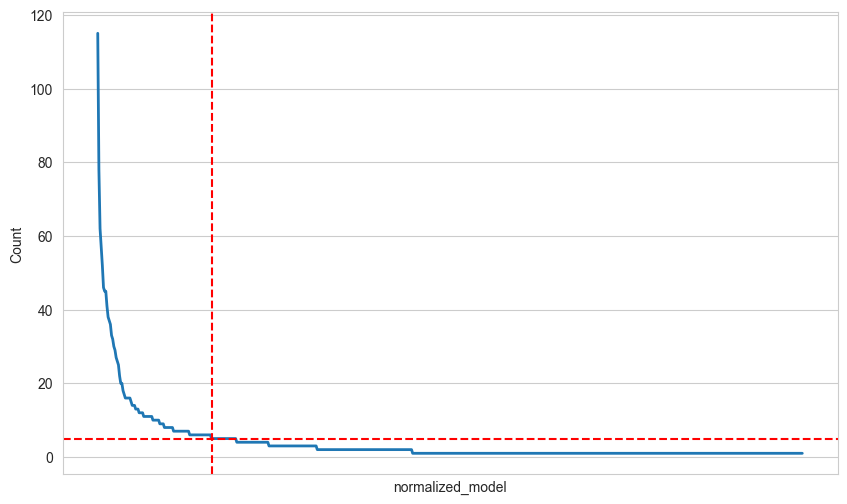

In [2]:

model_occurrences_threshold = 5


df['normalized_model'] = (
    df['brand'].str.lower() + ' ' 
    + df['model'].str.lower() + ' '
    + df['storage_size'].astype(str) + 'gb '
    + df['memory_size'].astype(str) + 'gb'
)


value_counts = df['normalized_model'].value_counts()
items_above_threshold = value_counts[value_counts > model_occurrences_threshold].count()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=value_counts.index, y=value_counts.values, sort=False, linewidth=2)

plt.xticks([])

# Add a y-axis label
plt.ylabel('Count')

plt.axhline(y=model_occurrences_threshold, color='red', linestyle='--') # line that represents the threshold
plt.axvline(x=items_above_threshold, color='red', linestyle='--') # line that splits the models that are above and below the threshold

# Show the plot
plt.show()


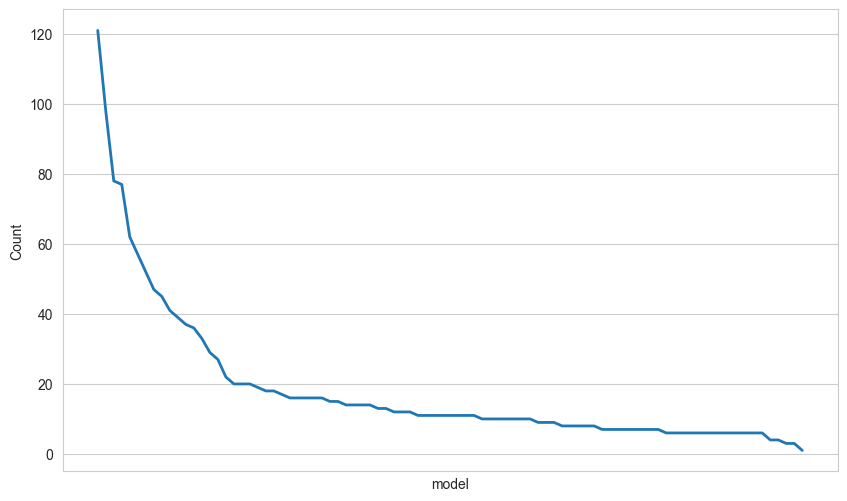

In [3]:
df = df[df['normalized_model'].isin(value_counts[value_counts > model_occurrences_threshold].index)]
value_counts = df['model'].value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=value_counts.index, y=value_counts.values, sort=False, linewidth=2)

plt.xticks([])

# Add a y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


## Melhores preços por gigabyte de memória interna e RAM

> Usando o preço dos celulares novos, vou avaliar somente os que oferecem o melhor preço por gigabyte de memória interna e RAM
> - preço por gigabyte de memória interna = preço médio / memória interna
> - preço por gigabyte de memória RAM = preço médio / memória RAM
> 
> tirar os 33% mais caros em cada um dos quesitos


/var/folders/m5/xgdzylgn46x2xm2br8kcx_x40000gq/T/ipykernel_58400/515653522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.sort_values("price_per_memory").index, y=avg_price['price_per_memory'].sort_values().values, palette='viridis')


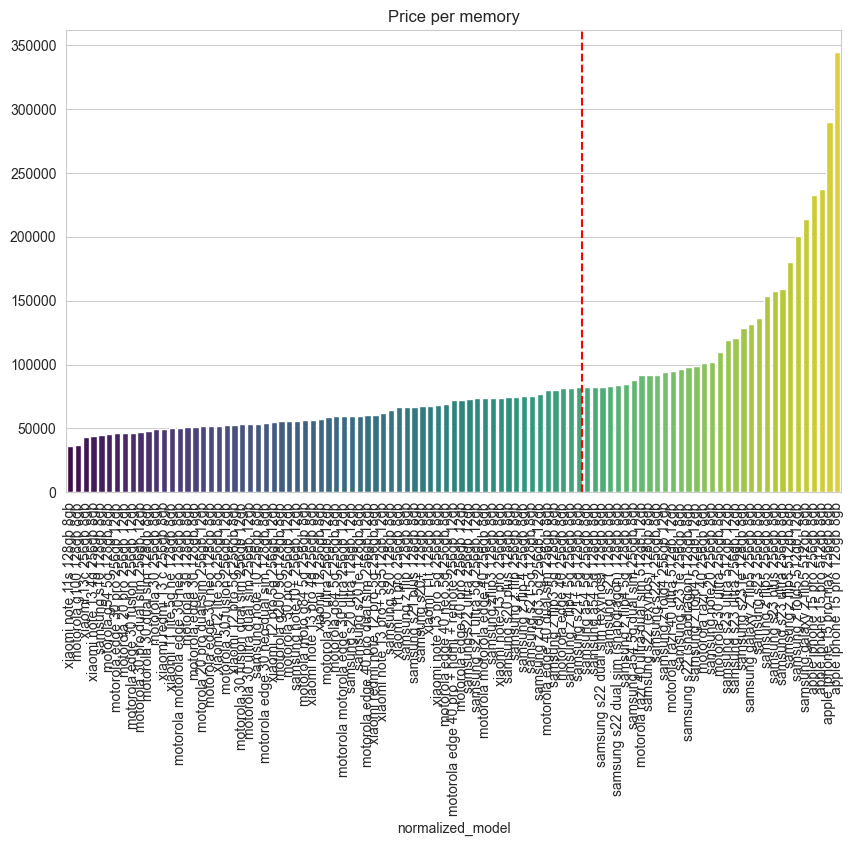

/var/folders/m5/xgdzylgn46x2xm2br8kcx_x40000gq/T/ipykernel_58400/515653522.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.sort_values("price_per_storage").index, y=avg_price['price_per_storage'].sort_values().values, palette='viridis')


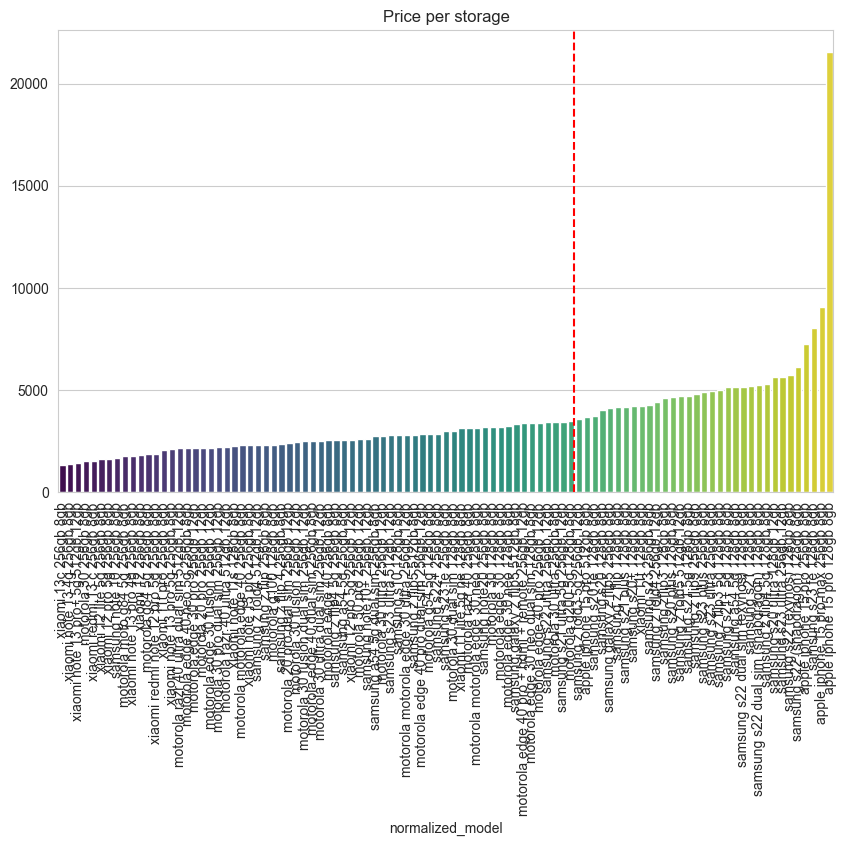

In [4]:

avg_price = df.groupby('normalized_model').agg({'price': 'mean', 'memory_size': 'mean', 'storage_size': 'mean'})

avg_price["price_per_storage"] = avg_price["price"] / avg_price["storage_size"]
avg_price["price_per_memory"] = avg_price["price"] / avg_price["memory_size"]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('Price per memory')
plt.axvline(x=avg_price.index.size*0.66, color='red', linestyle='--') # line that splits the models that are above and below the threshold
sns.barplot(x=avg_price.sort_values("price_per_memory").index, y=avg_price['price_per_memory'].sort_values().values, palette='viridis')
plt.show()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.title('Price per storage')
plt.axvline(x=avg_price.index.size*0.66, color='red', linestyle='--') # line that splits the models that are above and below the threshold
sns.barplot(x=avg_price.sort_values("price_per_storage").index, y=avg_price['price_per_storage'].sort_values().values, palette='viridis')
plt.show()


In [5]:
storage_price_threshold = avg_price["price_per_storage"].quantile(0.66)
models_to_remove_storage_price = avg_price[avg_price["price_per_storage"] > storage_price_threshold].index

memory_price_threshold = avg_price["price_per_memory"].quantile(0.66)
models_to_remove_memory_price = avg_price[avg_price["price_per_memory"] > memory_price_threshold].index

models_to_remove = set(models_to_remove_storage_price) | set(models_to_remove_memory_price)

df = df[~df['normalized_model'].isin(models_to_remove)]

df.head()

,title,price,permalink,brand,line,model,processor,storage,memory,condition,storage_size,memory_size,normalized_model
id,,,,,,,,,,,,,
MLA1231797178,Celular Samsung Galaxy Z Flip 4 5g 256gb 8gb R...,749999.0,https://articulo.mercadolibre.com.ar/MLA-12317...,Samsung,Galaxy Z,Z Flip4 5G,Snapdragon 8+ Gen 1,256 GB,8 GB,new,256,8,samsung z flip4 5g 256gb 8gb
MLA1416899515,Samsung Galaxy S10 128 Gb Prism Black Liberado,319599.0,https://articulo.mercadolibre.com.ar/MLA-14168...,Samsung,Galaxy S,S10,NaN,128 GB,8 GB,new,128,8,samsung s10 128gb 8gb
MLA1617177538,Samsung Galaxy S21 Ultra 5g 256 Gb Phantom Bla...,957199.0,https://articulo.mercadolibre.com.ar/MLA-16171...,Samsung,Galaxy S,S21 Ultra 5G,Exynos 2100,256 GB,12 GB,new,256,12,samsung s21 ultra 5g 256gb 12gb
MLA1400692449,Samsung Galaxy Z Flip 4 Azul Dual Sim Liberado,717999.0,https://articulo.mercadolibre.com.ar/MLA-14006...,Samsung,Galaxy,Z FLIP 4,NaN,256 GB,8 GB,new,256,8,samsung z flip 4 256gb 8gb
MLA1718212516,Samsung Galaxy S21 Ultra 256 Gb Silver 12 Gb R...,1077399.0,https://articulo.mercadolibre.com.ar/MLA-17182...,Samsung,Galaxy S,S21 Ultra 5G,NaN,256 GB,12 GB,new,256,12,samsung s21 ultra 5g 256gb 12gb


## Modelos que desvalorizam muito vão ser removidos
> Em algum momento vou querer vender meu celular, então vou remover os 33% dos modelos de celulares que mais desvalorizam
> 
> Por consequência todo os modelos que não tenham produtos novos ou usados no dataset vão ser removidos
> 
> A desvalorização vai ser calculada usando a diferença entre o preço médio do produto novo e o preço médio dos usados

/var/folders/m5/xgdzylgn46x2xm2br8kcx_x40000gq/T/ipykernel_58400/2019075539.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_diff_sorted.index, y=price_diff_sorted.values, palette='viridis')


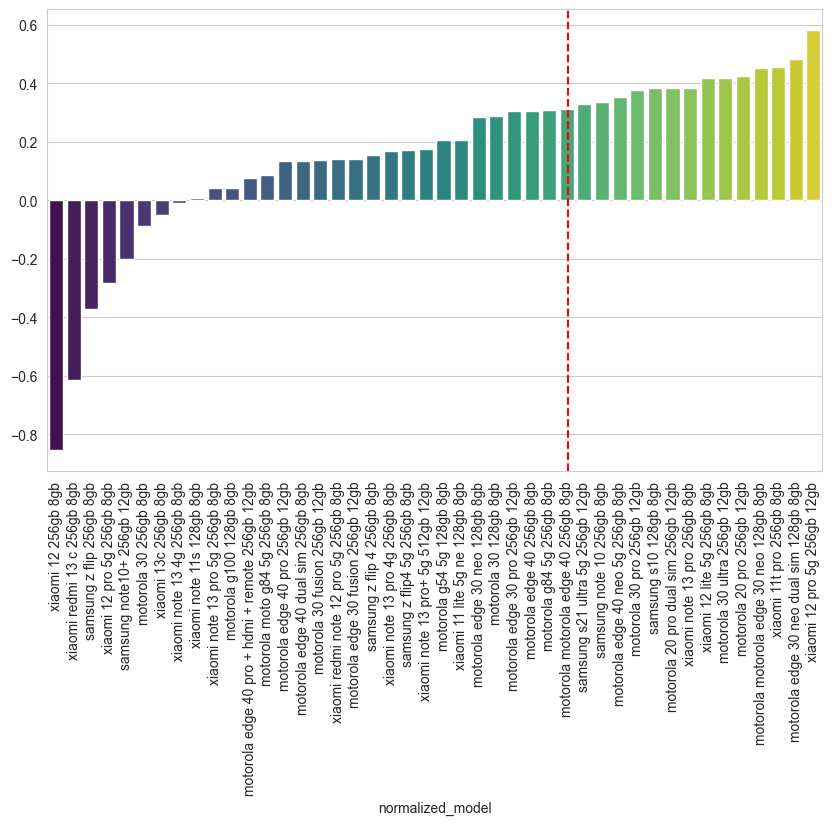

In [6]:
new_phone_avg_price = df[df['condition'] == 'new'].groupby('normalized_model')['price'].mean()

used_phone_avg_price = df[df['condition'] == 'used'].groupby('normalized_model')['price'].mean()

price_diff = (new_phone_avg_price - used_phone_avg_price)/new_phone_avg_price

models_to_remove_na = price_diff[price_diff.isna()].index

price_diff = price_diff.dropna()

price_diff_sorted = price_diff.sort_values()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.axvline(x=price_diff.index.size*0.66, color='red', linestyle='--') # line that splits the models that are above and below the threshold
sns.barplot(x=price_diff_sorted.index, y=price_diff_sorted.values, palette='viridis')
plt.show()

In [7]:



price_diff.sort_values(ascending=False, inplace=True)

top_66_percent_threshold = price_diff.quantile(0.66)

models_to_remove_price = price_diff[price_diff >= top_66_percent_threshold].index

df = df[~df['normalized_model'].isin(models_to_remove_price)]
df = df[~df['normalized_model'].isin(models_to_remove_na)]

df.head()

,title,price,permalink,brand,line,model,processor,storage,memory,condition,storage_size,memory_size,normalized_model
id,,,,,,,,,,,,,
MLA1231797178,Celular Samsung Galaxy Z Flip 4 5g 256gb 8gb R...,749999.0,https://articulo.mercadolibre.com.ar/MLA-12317...,Samsung,Galaxy Z,Z Flip4 5G,Snapdragon 8+ Gen 1,256 GB,8 GB,new,256,8,samsung z flip4 5g 256gb 8gb
MLA1400692449,Samsung Galaxy Z Flip 4 Azul Dual Sim Liberado,717999.0,https://articulo.mercadolibre.com.ar/MLA-14006...,Samsung,Galaxy,Z FLIP 4,NaN,256 GB,8 GB,new,256,8,samsung z flip 4 256gb 8gb
MLA1719218680,Xiaomi Redmi 13c Dual Sim 256 Gb Midnight Bla...,239999.0,https://articulo.mercadolibre.com.ar/MLA-17192...,Xiaomi,Redmi,13C,MediaTek Helio G85,256 GB,8 GB,new,256,8,xiaomi 13c 256gb 8gb
MLA1422165645,Xiaomi Redmi Note 13 4g Dual Sim 256 Gb Negro...,348999.0,https://articulo.mercadolibre.com.ar/MLA-14221...,Xiaomi,Redmi,Note 13 4G,Snapdragon 685,256 GB,8 GB,new,256,8,xiaomi note 13 4g 256gb 8gb
MLA1554952068,Xiaomi Redmi 12 Dual Sim 256 Gb Sky Blue 8 Gb...,268733.0,https://articulo.mercadolibre.com.ar/MLA-15549...,Xiaomi,Redmi,12,MediaTek Helio G88,256 GB,8 GB,new,256,8,xiaomi 12 256gb 8gb


## Qual as características do modelo mediano dos que sobraram?

> Do que restou, vou avaliar qual é o mais comum em memória e armazenamento que atendem os critérios já aplicados acima. Isso indica um celular que deve estar mais dentro de um range adequado de uso.

In [8]:
median_storage = df['storage_size'].value_counts().sort_values().index[-1]
median_memory = df['memory_size'].value_counts().sort_values().index[-1]

print(f"Median storage: {median_storage} GB")
print(f"Median memory: {median_memory} GB")

Median storage: 256 GB
Median memory: 8 GB


## Qual o anuncio de celular novo mais barato que atende os critérios?

> Vou olhar o anuncio mais barato de celular novo que atende os critérios acima

In [9]:
df = df[df['storage_size'] == median_storage]
df = df[df['memory_size'] == median_memory]
df = df[df['condition'] == 'new']

sorted_prices = df.sort_values('price')

selected_model = sorted_prices.iloc[0]

print(f"Brand: {selected_model['brand']}")
print(f"Model: {selected_model['model']}")
print(f"Price: {selected_model['price']}")
print(f"Link to the offer: {selected_model['permalink']}")

Brand: Xiaomi
Model: 13C
Price: 239999.0
Link to the offer: https://articulo.mercadolibre.com.ar/MLA-1719218680-xiaomi-redmi-13c-dual-sim-256-gb-midnight-black-8-gb-ram-_JM
